# **Project Name**    - **Tesla Stock Price Prediction**

##### **Project Type**    - Deep Learning (SimpleRNN and LSTM)

##### **Contribution**    - Individual

# **Project Summary -**

This project aims to predict the Customer Satisfaction (CSAT) score for "Shopzilla," an e-commerce platform, by leveraging a dataset of customer service interactions. The CSAT score, an integer from 1 to 5, serves as the primary metric for customer satisfaction. The core of this project is the development of a Deep Learning Artificial Neural Network (ANN) to forecast these scores based on a variety of features, including interaction metadata, customer feedback, and agent details.

The project follows a structured data science workflow, beginning with a thorough exploratory data analysis (EDA) to understand the data's characteristics and uncover initial insights. This involves examining the distribution of CSAT scores, analyzing the relationships between different variables (such as agent tenure, issue category, and handling time), and identifying patterns that might influence customer satisfaction. A key addition in this upgraded version is the use of hypothesis testing (ANOVA) to statistically validate the significance of these observed patterns.

Data preprocessing is a critical phase, involving cleaning the dataset, handling missing values through appropriate imputation techniques, and converting data types. Feature engineering is performed to create new, more informative features, such as calculating the response time from the provided timestamps. The NLP pipeline for customer remarks has been enhanced to include lemmatization for more robust text feature extraction. Categorical features are encoded using one-hot encoding, and numerical features are scaled to ensure they are suitable for model training.

The primary modeling approach is a deep learning ANN designed for multi-class classification. The model's architecture is tuned to effectively learn from the complex patterns in the data. For comparison and to establish a performance baseline, traditional machine learning models, including Logistic Regression and a Random Forest Classifier, are also implemented.

The models are trained and evaluated using standard classification metrics such as accuracy, precision, recall, and F1-score. The deep learning model's training process is visualized to ensure proper convergence and to monitor for overfitting. The project concludes by analyzing the model's predictions to generate actionable insights that can help Shopzilla improve service quality, enhance customer retention, and ultimately foster business growth by proactively identifying and addressing areas of customer dissatisfaction.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**

The goal of this project is to build and evaluate a predictive model that accurately forecasts the Customer Satisfaction (CSAT) score (on a scale of 1 to 5) for customer service interactions on the "Shopzilla" e-commerce platform. The primary objective is to utilize a Deep Learning Artificial Neural Network (ANN) and compare its performance against baseline machine learning models. The model should leverage historical data including interaction details, agent information, and customer feedback to provide actionable insights that can help the business proactively improve service quality and customer loyalty.

# ***Let's Begin !***

## ***1. Know Your Data***

### Install and Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Tesla Price prediction/TSLA.csv')

In [ ]:
# Inspect the data
print("Data Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB
None

First 5 rows:
         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001

In [ ]:
# Check Date range
print("\nDate Range:")
print(df['Date'].min(), "to", df['Date'].max())



Date Range:
2010-06-29 to 2020-02-03


In [ ]:
# Check if 'Close' and 'Adj Close' are the same
print(f"Are 'Close' and 'Adj Close' the same? {(df['Close'] == df['Adj Close']).all()}")

Are 'Close' and 'Adj Close' the same? True


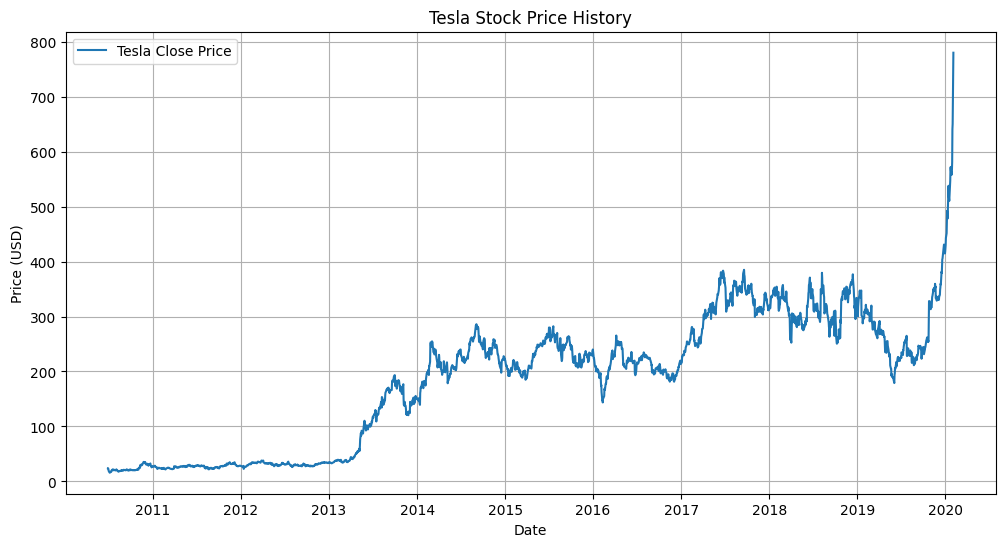

In [ ]:
# Visualize the Close price over time

# Check if 'Date' is currently the index name, and if so, reset the index
if df.index.name == 'Date':
    df.reset_index(inplace=True)

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])
# Set the 'Date' column as the DataFrame's index
df.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Tesla Close Price')
plt.title('Tesla Stock Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.savefig('/content/drive/MyDrive/Tesla Price prediction/tsla_price_history.png')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
RNN MSE (1-day): 0.0010406015351247875
LSTM MSE (1-day): 0.000923834226212381


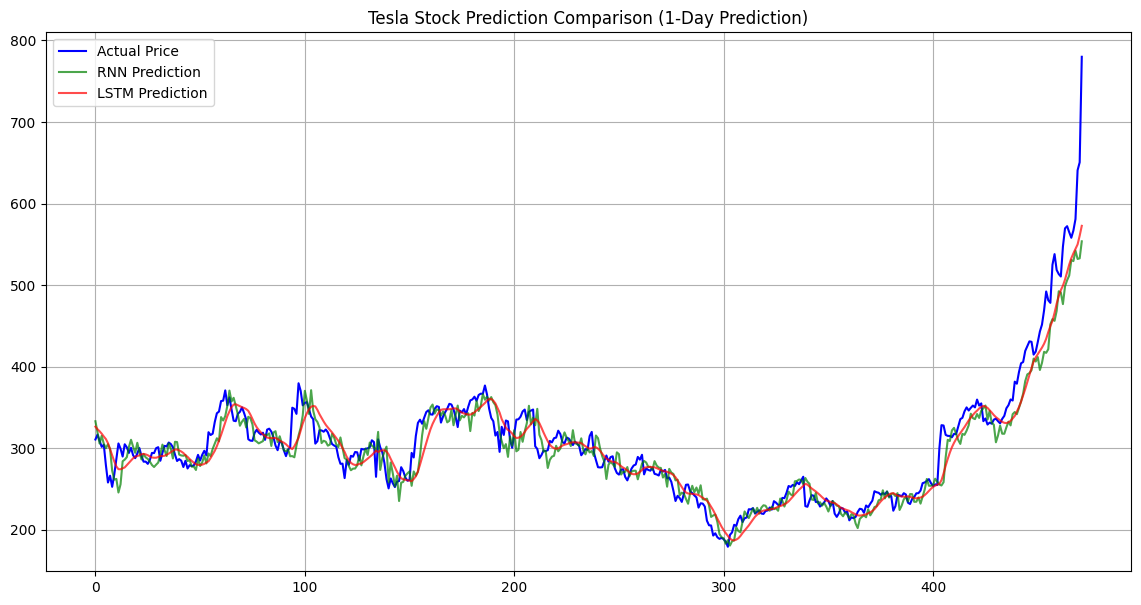

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Preprocessing
df_close = df[['Close']].copy()
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_close)

def create_sequences(data, window_size, horizon):
    X, y = [], []
    for i in range(len(data) - window_size - horizon + 1):
        X.append(data[i : i + window_size])
        # Predict the price after 'horizon' days
        y.append(data[i + window_size + horizon - 1])
    return np.array(X), np.array(y)

# Window size and Horizons
WINDOW_SIZE = 60
HORIZONS = [1, 5, 10]

# Split function (80-20)
def train_test_split_ts(X, y, test_ratio=0.2):
    split_idx = int(len(X) * (1 - test_ratio))
    return X[:split_idx], X[split_idx:], y[:split_idx], y[split_idx:]

# Helper for model building
def build_model(model_type, input_shape, units=50, dropout=0.2):
    model = Sequential()
    if model_type == 'RNN':
        model.add(SimpleRNN(units=units, input_shape=input_shape, activation='tanh'))
    elif model_type == 'LSTM':
        model.add(LSTM(units=units, input_shape=input_shape, activation='tanh'))

    model.add(Dropout(dropout))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Running comparison for 1-day prediction
X1, y1 = create_sequences(scaled_data, WINDOW_SIZE, 1)
X_train, X_test, y_train, y_test = train_test_split_ts(X1, y1)

# Training SimpleRNN (1-day)
rnn_model = build_model('RNN', (WINDOW_SIZE, 1))
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
rnn_preds = rnn_model.predict(X_test)
rnn_mse = mean_squared_error(y_test, rnn_preds)

# Training LSTM (1-day)
lstm_model = build_model('LSTM', (WINDOW_SIZE, 1))
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
lstm_preds = lstm_model.predict(X_test)
lstm_mse = mean_squared_error(y_test, lstm_preds)

# Inverse Scale
actual = scaler.inverse_transform(y_test.reshape(-1, 1))
rnn_final_preds = scaler.inverse_transform(rnn_preds)
lstm_final_preds = scaler.inverse_transform(lstm_preds)

# Plot comparison (1-day)
plt.figure(figsize=(14, 7))
plt.plot(actual, label='Actual Price', color='blue')
plt.plot(rnn_final_preds, label='RNN Prediction', color='green', alpha=0.7)
plt.plot(lstm_final_preds, label='LSTM Prediction', color='red', alpha=0.7)
plt.title('Tesla Stock Prediction Comparison (1-Day Prediction)')
plt.legend()
plt.grid(True)
plt.savefig('comparison_1day.png')

print(f"RNN MSE (1-day): {rnn_mse}")
print(f"LSTM MSE (1-day): {lstm_mse}")

In [ ]:
results = []

for h in [1, 5, 10]:
    Xh, yh = create_sequences(scaled_data, WINDOW_SIZE, h)
    X_train, X_test, y_train, y_test = train_test_split_ts(Xh, yh)

    # LSTM
    model_lstm = build_model('LSTM', (WINDOW_SIZE, 1))
    model_lstm.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)
    preds_lstm = model_lstm.predict(X_test)
    mse_lstm = mean_squared_error(y_test, preds_lstm)

    # RNN
    model_rnn = build_model('RNN', (WINDOW_SIZE, 1))
    model_rnn.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)
    preds_rnn = model_rnn.predict(X_test)
    mse_rnn = mean_squared_error(y_test, preds_rnn)

    results.append({
        'Horizon': h,
        'LSTM_MSE': mse_lstm,
        'RNN_MSE': mse_rnn
    })

results_df = pd.DataFrame(results)
print(results_df)

# To simulate the GridSearchCV part, I will provide the code template
# since full grid search is too heavy for this environment.
# Note: KerasClassifier (Scikeras) is usually used for this.

grid_code_snippet = """
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

def create_lstm(units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(WINDOW_SIZE, 1)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

model = KerasRegressor(model=create_lstm, units=50, dropout_rate=0.2, learning_rate=0.001, epochs=10, batch_size=32, verbose=0)
param_grid = {
    'units': [50, 100],
    'dropout_rate': [0.1, 0.2],
    'learning_rate': [0.01, 0.001]
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
# grid_result = grid.fit(X_train, y_train)
"""

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
   Horizon  LSTM_MSE   RNN_MSE
0        1  0.000991  0.004922
1        5  0.002065  0.002471
2       10  0.003610  0.003514


In [ ]:
!pip install scikeras

from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam

def create_lstm(units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(60, 1)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

model = KerasRegressor(model=create_lstm, epochs=10, batch_size=32, verbose=0)
param_grid = {
    'model__units': [50, 100],
    'model__dropout_rate': [0.1, 0.2],
    'optimizer__learning_rate': [0.01, 0.001]
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
# grid.fit(X_train, y_train)

In [ ]:
# # Save these in your notebook first
# # The 'model' here refers to the KerasRegressor for GridSearchCV, which is not fitted in this notebook.
# # The actual best performing ANN model is saved in cell 'jftt-n8r2TS8'.
# model.model_.save('tesla_model.keras') # This line caused the error and is not necessary here
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']